<a href="https://colab.research.google.com/github/mtalha7262/EmoDetector/blob/main/Facial_Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import os
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense,Input
from keras.models import Model
from keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import load_img
from keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from glob import glob
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm
import cv2

In [2]:
# Download the dataset
!kaggle datasets download -d msambare/fer2013

# Unzip the dataset
!unzip fer2013.zip


Streaming output truncated to the last 5000 lines.
  inflating: train/sad/Training_65242339.jpg  
  inflating: train/sad/Training_65267116.jpg  
  inflating: train/sad/Training_65275626.jpg  
  inflating: train/sad/Training_6529266.jpg  
  inflating: train/sad/Training_65329617.jpg  
  inflating: train/sad/Training_65338712.jpg  
  inflating: train/sad/Training_65338797.jpg  
  inflating: train/sad/Training_65387162.jpg  
  inflating: train/sad/Training_65404494.jpg  
  inflating: train/sad/Training_65426218.jpg  
  inflating: train/sad/Training_65430136.jpg  
  inflating: train/sad/Training_65437377.jpg  
  inflating: train/sad/Training_6545735.jpg  
  inflating: train/sad/Training_65463385.jpg  
  inflating: train/sad/Training_65473985.jpg  
  inflating: train/sad/Training_65502829.jpg  
  inflating: train/sad/Training_65505359.jpg  
  inflating: train/sad/Training_65508578.jpg  
  inflating: train/sad/Training_65516023.jpg  
  inflating: train/sad/Training_65524027.jpg  
  inflating

In [3]:
TRAIN_DIR = '/content/train'
TEST_DIR = "/content/test"

In [4]:

def createdataframe(dir):
    image_paths = []
    labels = []
    for label in os.listdir(dir):
        for imagename in os.listdir(os.path.join(dir,label)):
            image_paths.append(os.path.join(dir,label,imagename))
            labels.append(label)
        print(label, "completed")
    return image_paths,labels

In [5]:

train = pd.DataFrame()
train['image'], train['label'] = createdataframe(TRAIN_DIR)

happy completed
fear completed
disgust completed
sad completed
neutral completed
surprise completed
angry completed


In [6]:
print(train)

                                            image  label
0      /content/train/happy/Training_87906888.jpg  happy
1      /content/train/happy/Training_58817857.jpg  happy
2      /content/train/happy/Training_48929107.jpg  happy
3      /content/train/happy/Training_83420722.jpg  happy
4       /content/train/happy/Training_2843848.jpg  happy
...                                           ...    ...
28704  /content/train/angry/Training_66574043.jpg  angry
28705  /content/train/angry/Training_20272265.jpg  angry
28706   /content/train/angry/Training_5667727.jpg  angry
28707  /content/train/angry/Training_72893533.jpg  angry
28708  /content/train/angry/Training_78392730.jpg  angry

[28709 rows x 2 columns]


In [7]:
test = pd.DataFrame()
test['image'], test['label'] = createdataframe(TEST_DIR)

happy completed
fear completed
disgust completed
sad completed
neutral completed
surprise completed
angry completed


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [9]:
print(test)
print(test['image'])

                                             image  label
0     /content/test/happy/PrivateTest_94966354.jpg  happy
1     /content/test/happy/PrivateTest_35452818.jpg  happy
2     /content/test/happy/PrivateTest_86023839.jpg  happy
3     /content/test/happy/PrivateTest_40249114.jpg  happy
4     /content/test/happy/PrivateTest_94168367.jpg  happy
...                                            ...    ...
7173   /content/test/angry/PublicTest_70289097.jpg  angry
7174   /content/test/angry/PrivateTest_8186613.jpg  angry
7175   /content/test/angry/PublicTest_28628397.jpg  angry
7176   /content/test/angry/PublicTest_85640402.jpg  angry
7177  /content/test/angry/PrivateTest_90676809.jpg  angry

[7178 rows x 2 columns]
0       /content/test/happy/PrivateTest_94966354.jpg
1       /content/test/happy/PrivateTest_35452818.jpg
2       /content/test/happy/PrivateTest_86023839.jpg
3       /content/test/happy/PrivateTest_40249114.jpg
4       /content/test/happy/PrivateTest_94168367.jpg
              

In [10]:
def extract_features(images):
    features = []
    for image in tqdm(images):
        img = load_img(image, color_mode='grayscale' )
        img = np.array(img)
        features.append(img)
    features = np.array(features)
    features = features.reshape(len(features),48,48,1)
    return features

In [11]:
train_features = extract_features(train['image'])


  0%|          | 0/28709 [00:00<?, ?it/s]

In [12]:
test_features = extract_features(test['image'])


  0%|          | 0/7178 [00:00<?, ?it/s]

In [13]:

x_train = train_features/255.0
x_test = test_features/255.0

In [14]:
from sklearn.preprocessing import LabelEncoder


In [15]:

le = LabelEncoder()
le.fit(train['label'])

LabelEncoder()

In [16]:

y_train = le.transform(train['label'])
y_test = le.transform(test['label'])

In [17]:

y_train = to_categorical(y_train,num_classes = 7)
y_test = to_categorical(y_test,num_classes = 7)

In [24]:
model = Sequential()
# convolutional layers
model.add(Conv2D(128, kernel_size=(3,3), activation='relu', input_shape=(48,48,1)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(256, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(512, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(512, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Flatten())
# fully connected layers
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.3))
# output layer
model.add(Dense(7, activation='softmax'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [25]:
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [27]:
model.fit(x= x_train,y = y_train, batch_size = 128, epochs = 150, validation_data = (x_test,y_test))


Epoch 1/150
225/225 ━━━━━━━━━━━━━━━━━━━━ 28s 87ms/step - accuracy: 0.2536 - loss: 1.8089 - val_accuracy: 0.2629 - val_loss: 1.7753
Epoch 2/150
225/225 ━━━━━━━━━━━━━━━━━━━━ 11s 47ms/step - accuracy: 0.2732 - loss: 1.7528 - val_accuracy: 0.2990 - val_loss: 1.6912
Epoch 3/150
225/225 ━━━━━━━━━━━━━━━━━━━━ 21s 48ms/step - accuracy: 0.3253 - loss: 1.6779 - val_accuracy: 0.3851 - val_loss: 1.5665
Epoch 4/150
225/225 ━━━━━━━━━━━━━━━━━━━━ 20s 46ms/step - accuracy: 0.3786 - loss: 1.5874 - val_accuracy: 0.4252 - val_loss: 1.4896
Epoch 5/150
225/225 ━━━━━━━━━━━━━━━━━━━━ 21s 47ms/step - accuracy: 0.4094 - loss: 1.5190 - val_accuracy: 0.4659 - val_loss: 1.3839
Epoch 6/150
225/225 ━━━━━━━━━━━━━━━━━━━━ 21s 48ms/step - accuracy: 0.4399 - loss: 1.4557 - val_accuracy: 0.4877 - val_loss: 1.3322
Epoch 7/150
225/225 ━━━━━━━━━━━━━━━━━━━━ 20s 47ms/step - accuracy: 0.4515 - loss: 1.4158 - val_accuracy: 0.4987 - val_loss: 1.3128
Epoch 8/150
225/225 ━━━━━━━━━━━━━━━━━━━━ 20s 46ms/step - accuracy: 0.4704 - loss: 1

In [28]:
test_loss, test_accuracy = model.evaluate(x_test, y_test)

print("Test accuracy:" ,test_accuracy)

225/225 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7044 - loss: 0.8855
Test accuracy: 0.6355530619621277


In [29]:
from keras.models import model_from_json

In [30]:
model_json = model.to_json()
with open("emotiondetector.json",'w') as json_file:
    json_file.write(model_json)
model.save("emotiondetector.h5")

In [31]:
label = ['angry','disgust','fear','happy','neutral','sad','surprise']


In [32]:
def ef(image):
    img = load_img(image,color_mode='grayscale' )
    feature = np.array(img)
    feature = feature.reshape(1,48,48,1)
    return feature/255.0

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 518ms/step
model prediction is  surprise


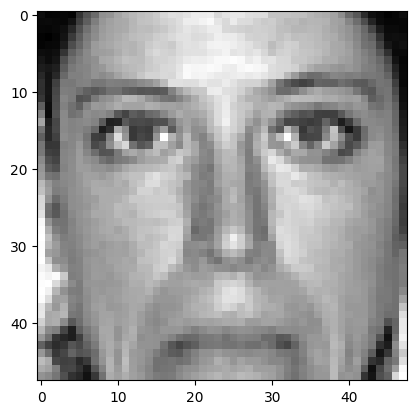

In [33]:
image = '/content/test/disgust/PrivateTest_11895083.jpg'
# print("original image is of happy")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)
plt.imshow(img.reshape(48,48),cmap='gray')